#### CROP RECOMMENDER SYSTEM 
- This project is designed to explore the types of crops that grow best in certain evironmental and soil factors.
- At the end, a predictive model (multiclass clasifier) would be built to inform farmers about the best crops to plant in given environmental conditions


In [129]:
# Importing common modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import joblib

In [3]:
# Loading the dataset into pandas dataframe 
df = pd.read_csv('Crop_recommendation.csv')
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Checking the data types of the crop dataset 
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
# Summary statistics 
df.describe(include = 'all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [6]:
# Checking for missing values 
df.isnull().sum() # No missing values present 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
# Checking for class imbalances and value counts for target variable 
df['label'].value_counts()  # Very balanced dataset 

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

#### Exploratory Data Analysis 
- Correlational Analysis between features for potential feature selection
- Visualization between features and target for quick insights and trends 

In [9]:
# Correlational Analysis between the numerical columns 
num_columns = df.select_dtypes(include =['float64','int64'])
corr_matrix = num_columns.corr()
corr_matrix 

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


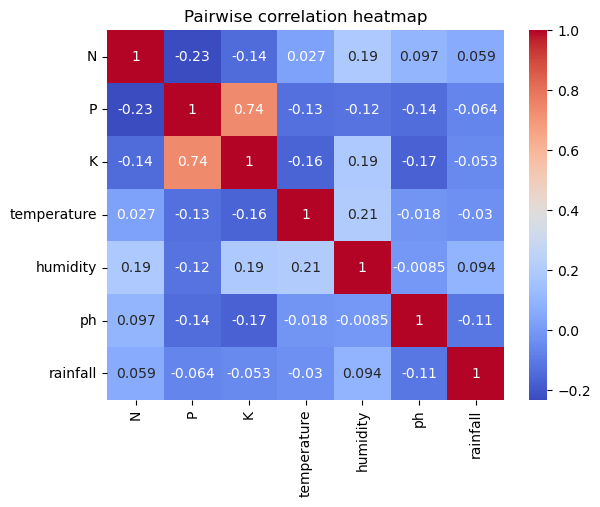

In [10]:
# HeatMap for pairwise correlations between the numerical variables 
sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm') 
plt.title('Pairwise correlation heatmap')
plt.show()

- Phosphorus and pootassium seem to have a strong positive relationship with each other potentially showing signs of multicollinearilty

In [12]:
 # Checking for multicollinearity between phosphorus and potassium using Variance Inflation Factor
X = df[['humidity', 'rainfall']]

# Adding a constant for the intercept term
X = add_constant(X)

# Computing VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Feature        VIF
0     const  13.831252
1  humidity   1.008996
2  rainfall   1.008996


- VIF well below 10 hence no multicollinearity between these two features

<Axes: xlabel='P', ylabel='label'>

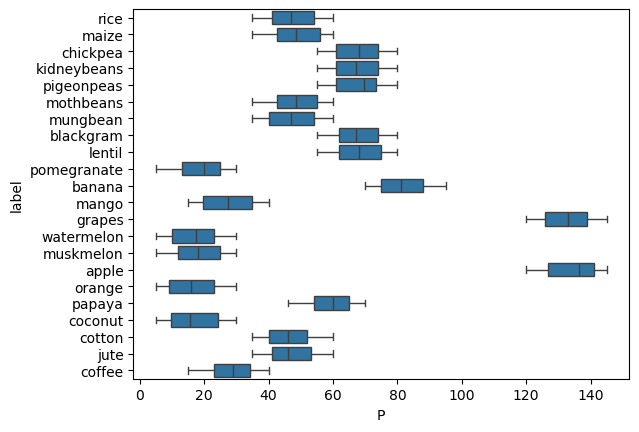

In [14]:
# Distirbution of phosphorus for the different crop types 
sns.boxplot(x = 'P', y = 'label', data = df)

- interesting note here is that apples and grapes are successfully grown in soil with higher levels of phosphorus compared to the rest

<Axes: xlabel='N', ylabel='label'>

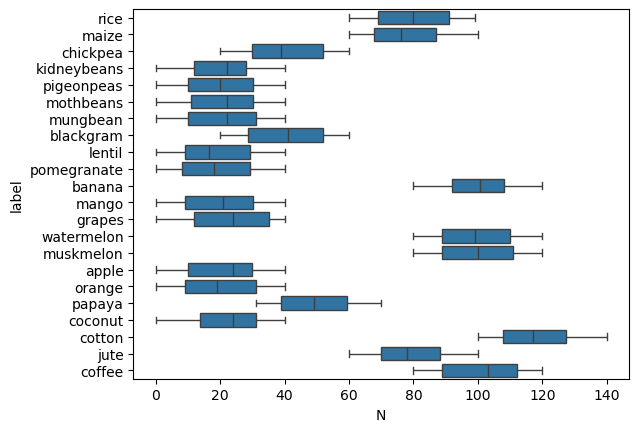

In [16]:
# Distirbution of nitrogen for the different crop types 
sns.boxplot(x = 'N', y = 'label', data = df)

<Axes: xlabel='K', ylabel='label'>

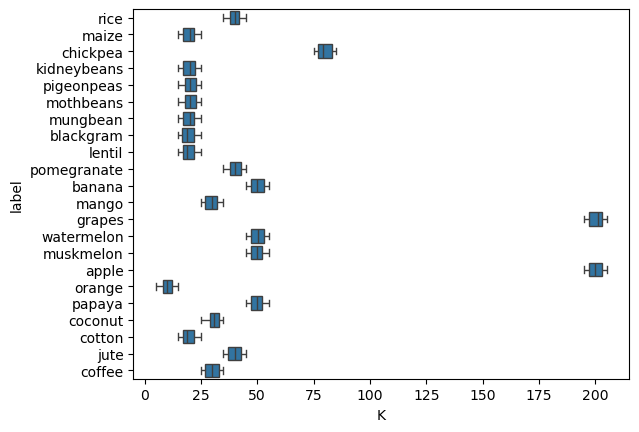

In [17]:
# Distirbution of potassium for the different crop types 
sns.boxplot(x = 'K', y = 'label', data = df)

- Again, grapes and apples seem to require large amount of potassium levels in the soil as compared to the rest of the crop. So soils generally high in potassium and phosphorus would be good candidates to grow these crops. Other crop type seem to follow similar soil conditions especially for potassium levels 

In [19]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

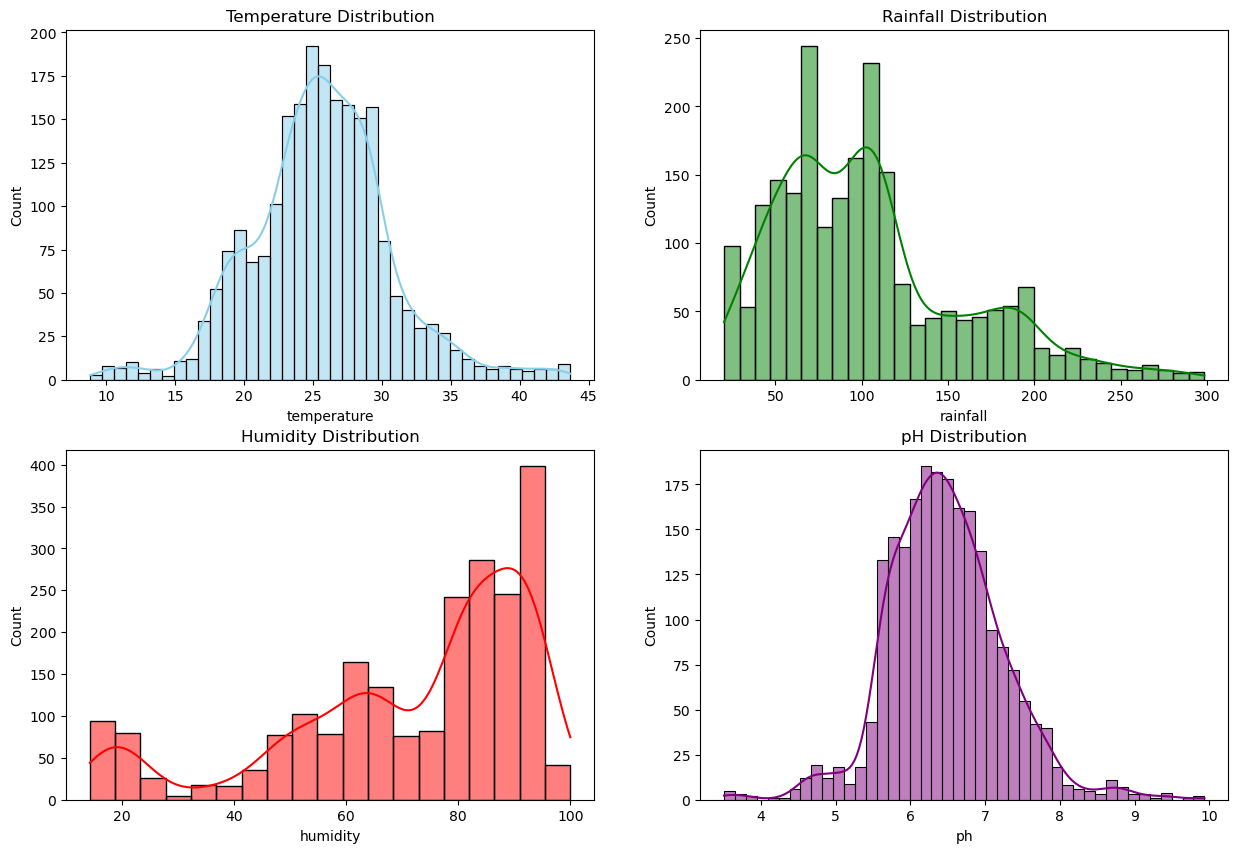

In [20]:
# Distribution of rainfall, humidity, pH and temperature
fig, axes = plt.subplots(2,2, figsize=[15,10])

#Temperature Distribution across the various crop types
sns.histplot(x = 'temperature',data=df, kde = True, color = 'skyblue', ax=axes[0,0])
axes[0,0].set_title('Temperature Distribution')

#Rainfall Distribution across the various crop types
sns.histplot(x = 'rainfall',data=df, kde = True, color ='green',ax=axes[0,1])
axes[0,1].set_title('Rainfall Distribution')

#Humidity Distribution across the various crop types
sns.histplot(x = 'humidity',data=df, kde = True, color ='red', ax=axes[1,0])
axes[1,0].set_title('Humidity Distribution')

# pH Distribution across the various crop types
sns.histplot(x = 'ph',data=df, kde = True, color ='purple', ax=axes[1,1])
axes[1,1].set_title('pH Distribution')

plt.show()



- Temperature Distribution -- The temperature distribution is approximately normal hence most of the crops are grown around the mean temperature which is about 25 degree celsius.
- Rainfall distribution of the crop types shows a right skewed distribution. Most of the crops here are grown with slightly lower amounts of rainfall.
- The humidiity distribution in this dataset shows a left skewed dataset where crops that see the most yield are grown in slightly higher levels of humidity.
- pH levels follows a normal distribution across the various crops type. Hence most crops see success if they are grown in soils that are not too acidic or alkaline 

In [22]:
 df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

#### Anova Analysis for Temperature

In [24]:
# ANOVA ANALYSIS  
groups = [] 
for crop in df['label'].unique():
    crop_groups = df[df['label'] == crop]['temperature']
    groups.append(crop_groups)
f_stat, p_value = f_oneway(*groups)
print(f'F statistic for temperature {f_stat}')
print(f'P_value for temperatue {p_value}')


F statistic for temperature 102.18698122995393
P_value for temperatue 4.019323818173197e-305


- P value is extremely small suggesting there is a difference between the mean temperature across each crop type and these differences was not due to random chance. 

#### Anova Analysis for Rainfall

In [27]:
# ANOVA ANALYSIS  
groups = [] 
for crop in df['label'].unique():
    crop_groups = df[df['label'] == crop]['rainfall']
    groups.append(crop_groups)
f_stat, p_value = f_oneway(*groups)
print(f'F statistic for rainfall {f_stat}')
print(f'P_value for rainfall {p_value}')


F statistic for rainfall 605.5279661441423
P_value for rainfall 0.0


- P value of 0.0 suggest the differences between the mean rainfall across each of the different crop type is statistically significant and hence rainfall may be suitable to be used in modelling the relationship with the crop types 

#### Anova Analysis for Humidity

In [30]:
# ANOVA ANALYSIS  
groups = [] 
for crop in df['label'].unique():
    crop_groups = df[df['label'] == crop]['humidity']
    groups.append(crop_groups)
f_stat, p_value = f_oneway(*groups)
print(f'F statistic for humidity {f_stat}')
print(f'P_value for humidity {p_value}')


F statistic for humidity 3103.708891217461
P_value for humidity 0.0


- P value of 0.0 also suggest the differences in mean humidity levels across the different crop types is statistically significant 

#### Model building and Evaluation 

In [94]:
# Splitting dataset into input features and a target variable 
X = df.drop('label',axis = 1)
y = df['label']

In [110]:
# Label encoding the target variable 
le = LabelEncoder()
transformed_y = le.fit_transform(y)

In [112]:
# Splitting the dataset into training and test set 
X_train,X_test,y_train,y_test = train_test_split(X,transformed_y,test_size= 0.2,random_state=42)

In [114]:
# Standard Scaling numerical features
std = StandardScaler()
scaled_x_train = std.fit_transform(X_train)
scaled_x_test = std.transform(X_test)

In [120]:
# Initial model building with Logistic Regression
log = LogisticRegression()
log.fit(scaled_x_train,y_train)

LogisticRegression()

In [126]:
# Metrics associated with initial base model exploration with logistic regresion
y_test_pred = log.predict(scaled_x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       0.96    

The model performed well across all evaluation metrics, achieving an accuracy, precision, recall, and F1-score of 0.96, indicating strong and consistent performance across all classes.

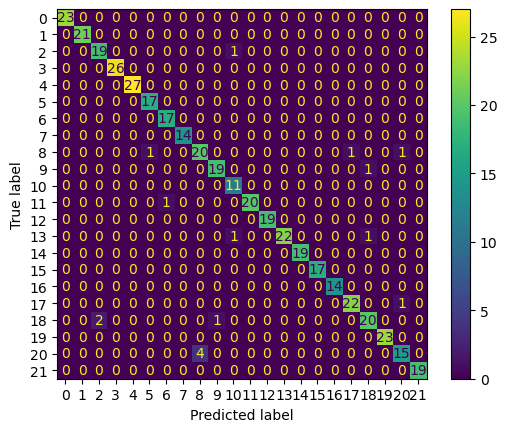

In [137]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

From the confusion matrix, model was able to correctly classify most of the different crop types as shown by the diagonal cells. There were however some minor misclassfications like class 20 being misclassified as class 8 four times or class 18 being misclassified as class 2 twice. Overall the confusion matrix shows high accuracy score


#### Model Interpretability 

In [152]:
# Feature importance for Logistic Regression using coefficients 
# Assuming 'X' was the original DataFrame before scaling
feature_names = X.columns  

# Then this works correctly
coef_df = pd.DataFrame(log.coef_.T, index=feature_names, columns=[f'Class {i}' for i in range(log.coef_.shape[0])])
coef_df

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 12,Class 13,Class 14,Class 15,Class 16,Class 17,Class 18,Class 19,Class 20,Class 21
N,-0.861764,2.743353,-0.025129,-0.018859,-1.988396,3.100783,4.436208,-0.414166,1.272977,-0.996448,...,-1.740485,-1.796073,-2.332825,1.996436,-1.539363,-0.409493,-2.003023,-2.315168,1.667683,2.112707
P,2.510425,3.417425,2.696647,0.423095,-2.624645,-2.757839,0.707231,2.110001,0.136401,0.896672,...,-3.431846,-1.634527,-0.237080,-1.774773,-2.498258,1.815176,2.634559,-2.406585,-0.063101,-2.857963
K,2.903198,0.887662,-1.429362,2.506859,-0.045937,-0.321738,-3.041158,3.773270,1.056994,-2.463821,...,1.164019,-1.195473,-1.992019,0.349771,-5.215821,1.257571,-0.877533,3.123781,-0.128173,2.628112
temperature,0.140166,0.940920,1.342291,-1.641998,0.802470,0.209481,-1.044719,0.292822,-0.073603,-1.222784,...,1.354173,0.635192,0.589020,2.044014,-0.327148,1.628441,0.760904,-0.953621,-1.050443,-1.257419
humidity,2.346244,0.831033,-0.474963,-3.369836,2.483955,-3.371247,1.460568,-1.103540,0.669729,-4.802485,...,-2.721011,-3.306078,3.262648,2.701075,2.407031,4.422999,-1.744293,1.181283,0.770929,0.213734
ph,-0.691106,-1.259706,0.430618,0.747615,-1.301371,0.706922,0.845844,-0.295847,0.511941,-0.207128,...,-0.186356,0.358767,0.124934,-0.527380,0.937029,0.783719,-0.622130,0.003230,-0.489096,0.116289
rainfall,2.240038,0.310642,-0.554809,-0.352521,3.153124,2.249228,-0.559873,-3.063802,2.386925,0.297762,...,0.709334,-3.898434,-3.424557,-4.421896,0.774465,1.419627,2.948695,-0.009539,5.487569,-0.966924


Each class label shows the strength and direction in prediction that class under certain feature conditions. FOr example : For class 0, our model was likely to predict that label when phosphorus,potassium and humidity was likely. It was less likely to predict this class when pH and nitrogen was low.Based on certain envrionmental conditions, this model does a very good job in recommending the best crops to grow 

In [139]:
# Saving model
import joblib
joblib.dump(log,'log_model.pkl')

['log_model.pkl']